In [1]:
# Import Pandas, Matplotlib, and Numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

1. Import out dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop thorough the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cfd4bcdd8a6b48e067aa7a3a6d783fcd


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): # To check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Records {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Records 1 of Set 1 | vaini
Processing Records 2 of Set 1 | zeya
Processing Records 3 of Set 1 | severo-kurilsk
Processing Records 4 of Set 1 | natchitoches
Processing Records 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Records 6 of Set 1 | rikitea
Processing Records 7 of Set 1 | khonuu
City not found. Skipping...
Processing Records 8 of Set 1 | saskylakh
Processing Records 9 of Set 1 | albany
Processing Records 10 of Set 1 | kapaa
Processing Records 11 of Set 1 | bluff
Processing Records 12 of Set 1 | llallagua
Processing Records 13 of Set 1 | guerrero negro
Processing Records 14 of Set 1 | lebu
Processing Records 15 of Set 1 | ponta do sol
Processing Records 16 of Set 1 | cherskiy
Processing Records 17 of Set 1 | karratha
Processing Records 18 of Set 1 | new norfolk
Processing Records 19 of Set 1 | ushuaia
Processing Records 20 of Set 1 | babanusah
City not found. Skipping...
Processing Records 2

Processing Records 34 of Set 4 | daru
Processing Records 35 of Set 4 | port alfred
Processing Records 36 of Set 4 | canico
Processing Records 37 of Set 4 | susuman
Processing Records 38 of Set 4 | katsuura
Processing Records 39 of Set 4 | scottsbluff
Processing Records 40 of Set 4 | santa lucia
Processing Records 41 of Set 4 | souillac
Processing Records 42 of Set 4 | orumiyeh
Processing Records 43 of Set 4 | chapais
Processing Records 44 of Set 4 | kahului
Processing Records 45 of Set 4 | bharatpur
Processing Records 46 of Set 4 | bethel
Processing Records 47 of Set 4 | itaituba
Processing Records 48 of Set 4 | salalah
Processing Records 49 of Set 4 | flinders
Processing Records 50 of Set 4 | scottsburgh
City not found. Skipping...
Processing Records 1 of Set 5 | warqla
City not found. Skipping...
Processing Records 2 of Set 5 | pisco
Processing Records 3 of Set 5 | horn lake
Processing Records 4 of Set 5 | balgazyn
Processing Records 5 of Set 5 | jumla
Processing Records 6 of Set 5 |

Processing Records 22 of Set 8 | verkhnyaya inta
Processing Records 23 of Set 8 | maldonado
Processing Records 24 of Set 8 | vulcan
Processing Records 25 of Set 8 | shingu
Processing Records 26 of Set 8 | sunrise manor
Processing Records 27 of Set 8 | bathsheba
Processing Records 28 of Set 8 | cariamanga
Processing Records 29 of Set 8 | raudeberg
Processing Records 30 of Set 8 | srednekolymsk
Processing Records 31 of Set 8 | cayenne
Processing Records 32 of Set 8 | vilyuysk
Processing Records 33 of Set 8 | salitral
Processing Records 34 of Set 8 | adrar
Processing Records 35 of Set 8 | santo antonio do sudoeste
Processing Records 36 of Set 8 | tasbuget
City not found. Skipping...
Processing Records 37 of Set 8 | nago
Processing Records 38 of Set 8 | tawang
Processing Records 39 of Set 8 | mogadishu
Processing Records 40 of Set 8 | tamale
Processing Records 41 of Set 8 | bay roberts
Processing Records 42 of Set 8 | uyutne
Processing Records 43 of Set 8 | bedele
Processing Records 44 of 

Processing Records 6 of Set 12 | groningen
Processing Records 7 of Set 12 | havelock
Processing Records 8 of Set 12 | sinnamary
Processing Records 9 of Set 12 | kirillov
Processing Records 10 of Set 12 | aksarka
Processing Records 11 of Set 12 | braslav
City not found. Skipping...
Processing Records 12 of Set 12 | kingman
Processing Records 13 of Set 12 | pathein
Processing Records 14 of Set 12 | wuchang
Processing Records 15 of Set 12 | oktyabrskiy
Processing Records 16 of Set 12 | north bend
Processing Records 17 of Set 12 | kati
Processing Records 18 of Set 12 | wenling
Processing Records 19 of Set 12 | mandurah
Processing Records 20 of Set 12 | penzance
Processing Records 21 of Set 12 | castellana grotte
Processing Records 22 of Set 12 | tricase
Processing Records 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Records 24 of Set 12 | kudahuvadhoo
Processing Records 25 of Set 12 | labutta
City not found. Skipping...
Processing Records 26 of Set 12 | san ignacio
P

In [8]:
len(city_data)

585

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,80.60,78,75,3.36,TO,2020-05-05 04:20:27
1,Zeya,53.75,127.27,55.18,29,22,6.38,RU,2020-05-05 04:20:28
2,Severo-Kurilsk,50.68,156.12,39.34,93,100,21.05,RU,2020-05-05 04:20:28
3,Natchitoches,31.77,-93.13,73.40,83,1,6.93,US,2020-05-05 04:20:28
4,Rikitea,-23.12,-134.97,73.35,71,100,16.15,PF,2020-05-05 04:20:28
5,Saskylakh,71.92,114.08,8.83,93,99,15.48,RU,2020-05-05 04:20:28
6,Albany,42.60,-73.97,46.00,74,1,1.01,US,2020-05-05 04:17:59
7,Kapaa,22.08,-159.32,77.00,69,40,20.80,US,2020-05-05 04:20:28
8,Bluff,-46.60,168.33,46.65,65,91,15.88,NZ,2020-05-05 04:20:29
9,Llallagua,-18.42,-66.63,46.85,15,99,1.72,BO,2020-05-05 04:20:29


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-05-05 04:20:27,-21.20,-175.20,80.60,78,75,3.36
1,Zeya,RU,2020-05-05 04:20:28,53.75,127.27,55.18,29,22,6.38
2,Severo-Kurilsk,RU,2020-05-05 04:20:28,50.68,156.12,39.34,93,100,21.05
3,Natchitoches,US,2020-05-05 04:20:28,31.77,-93.13,73.40,83,1,6.93
4,Rikitea,PF,2020-05-05 04:20:28,-23.12,-134.97,73.35,71,100,16.15
5,Saskylakh,RU,2020-05-05 04:20:28,71.92,114.08,8.83,93,99,15.48
6,Albany,US,2020-05-05 04:17:59,42.60,-73.97,46.00,74,1,1.01
7,Kapaa,US,2020-05-05 04:20:28,22.08,-159.32,77.00,69,40,20.80
8,Bluff,NZ,2020-05-05 04:20:29,-46.60,168.33,46.65,65,91,15.88
9,Llallagua,BO,2020-05-05 04:20:29,-18.42,-66.63,46.85,15,99,1.72


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

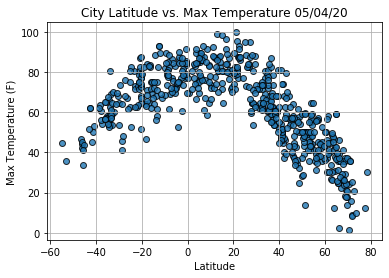

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

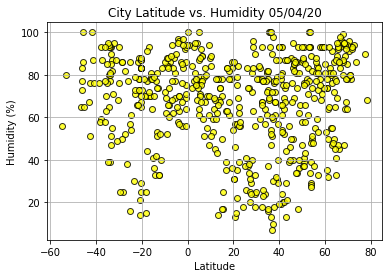

In [16]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="yellow")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

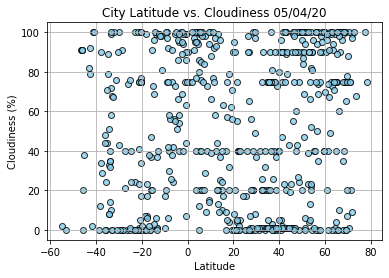

In [17]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="skyblue")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

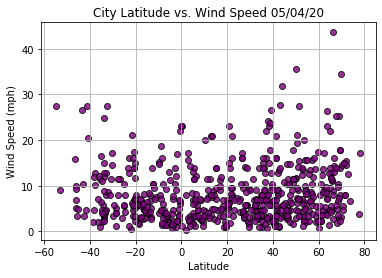

In [18]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="purple")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_vales, title, y_label, text_coordinates):


    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y vales.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2020-05-05 04:20:29
Lat                         68.75
Lng                         161.3
Max Temp                    29.46
Humidity                       94
Cloudiness                    100
Wind Speed                   2.91
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

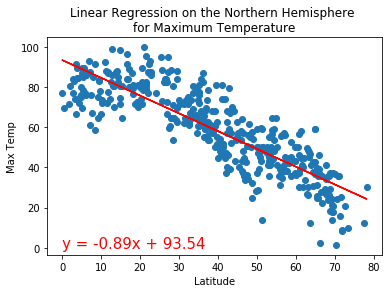

The r-value is: -0.855


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 'Max Temp', (0,0))

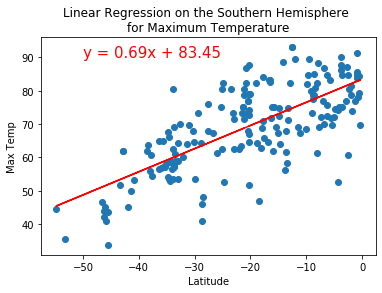

The r-value is: 0.722


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

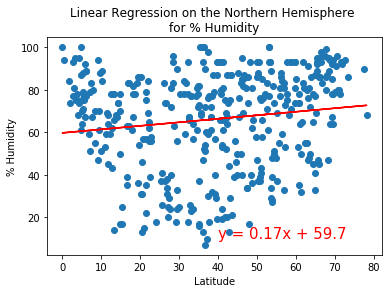

The r-value is: 0.145


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

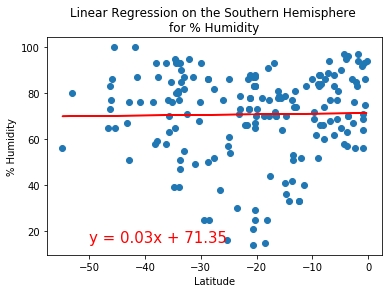

The r-value is: 0.018


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

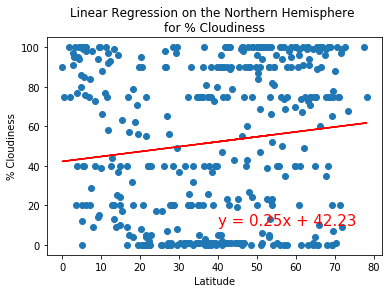

The r-value is: 0.129


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

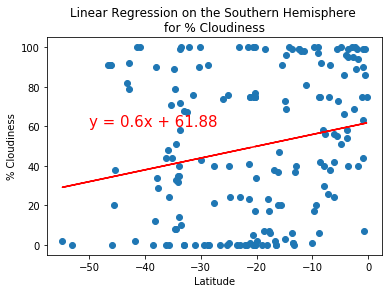

The r-value is: 0.212


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

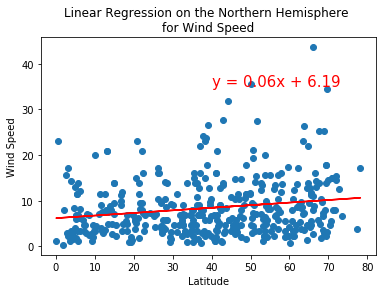

The r-value is: 0.182


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

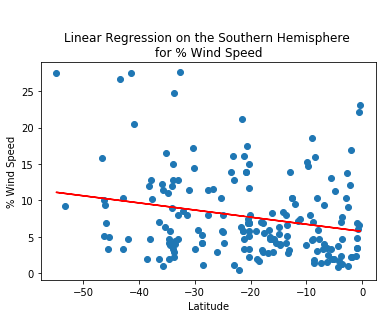

The r-value is: -0.226


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Wind Speed', '% Wind Speed',(-50,35))